# 2015 Happiness Data Exploratory Analysis
#### Load standard libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview
#### Load data

In [33]:
df = pd.read_csv("2015.csv")

In [34]:
df.set_index("Country", inplace = True) # Set country as index
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


In [36]:
print(df.head())
print(df.shape)

                     Region  Happiness Rank  Happiness Score  Standard Error  \
Country                                                                        
Switzerland  Western Europe               1            7.587         0.03411   
Iceland      Western Europe               2            7.561         0.04884   
Denmark      Western Europe               3            7.527         0.03328   
Norway       Western Europe               4            7.522         0.03880   
Canada        North America               5            7.427         0.03553   

             Economy (GDP per Capita)   Family  Health (Life Expectancy)  \
Country                                                                    
Switzerland                   1.39651  1.34951                   0.94143   
Iceland                       1.30232  1.40223                   0.94784   
Denmark                       1.32548  1.36058                   0.87464   
Norway                        1.45900  1.33095             

#### The data has 158 rows and 11 columns. Each row represent a country and each column contains information about the countries. The key variables that influence Happiness Score are:
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity.

In [42]:
key_variables = ["Happiness Score", "Economy (GDP per Capita)","Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity",]
print(df[key_variables].head())

             Happiness Score  Economy (GDP per Capita)   Family  \
Country                                                           
Switzerland            7.587                   1.39651  1.34951   
Iceland                7.561                   1.30232  1.40223   
Denmark                7.527                   1.32548  1.36058   
Norway                 7.522                   1.45900  1.33095   
Canada                 7.427                   1.32629  1.32261   

             Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
Country                                                                         
Switzerland                   0.94143  0.66557                        0.41978   
Iceland                       0.94784  0.62877                        0.14145   
Denmark                       0.87464  0.64938                        0.48357   
Norway                        0.88521  0.66973                        0.36503   
Canada                        0.90563  0.632

# Exploratory Analysis

In [43]:
print(df[key_variables].describe())

       Happiness Score  Economy (GDP per Capita)      Family  \
count       158.000000                158.000000  158.000000   
mean          5.375734                  0.846137    0.991046   
std           1.145010                  0.403121    0.272369   
min           2.839000                  0.000000    0.000000   
25%           4.526000                  0.545808    0.856823   
50%           5.232500                  0.910245    1.029510   
75%           6.243750                  1.158448    1.214405   
max           7.587000                  1.690420    1.402230   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                158.000000  158.000000                     158.000000   
mean                   0.630259    0.428615                       0.143422   
std                    0.247078    0.150693                       0.120034   
min                    0.000000    0.000000                       0.000000   
25%                    0.439185  

### Pairwise Scatterplot

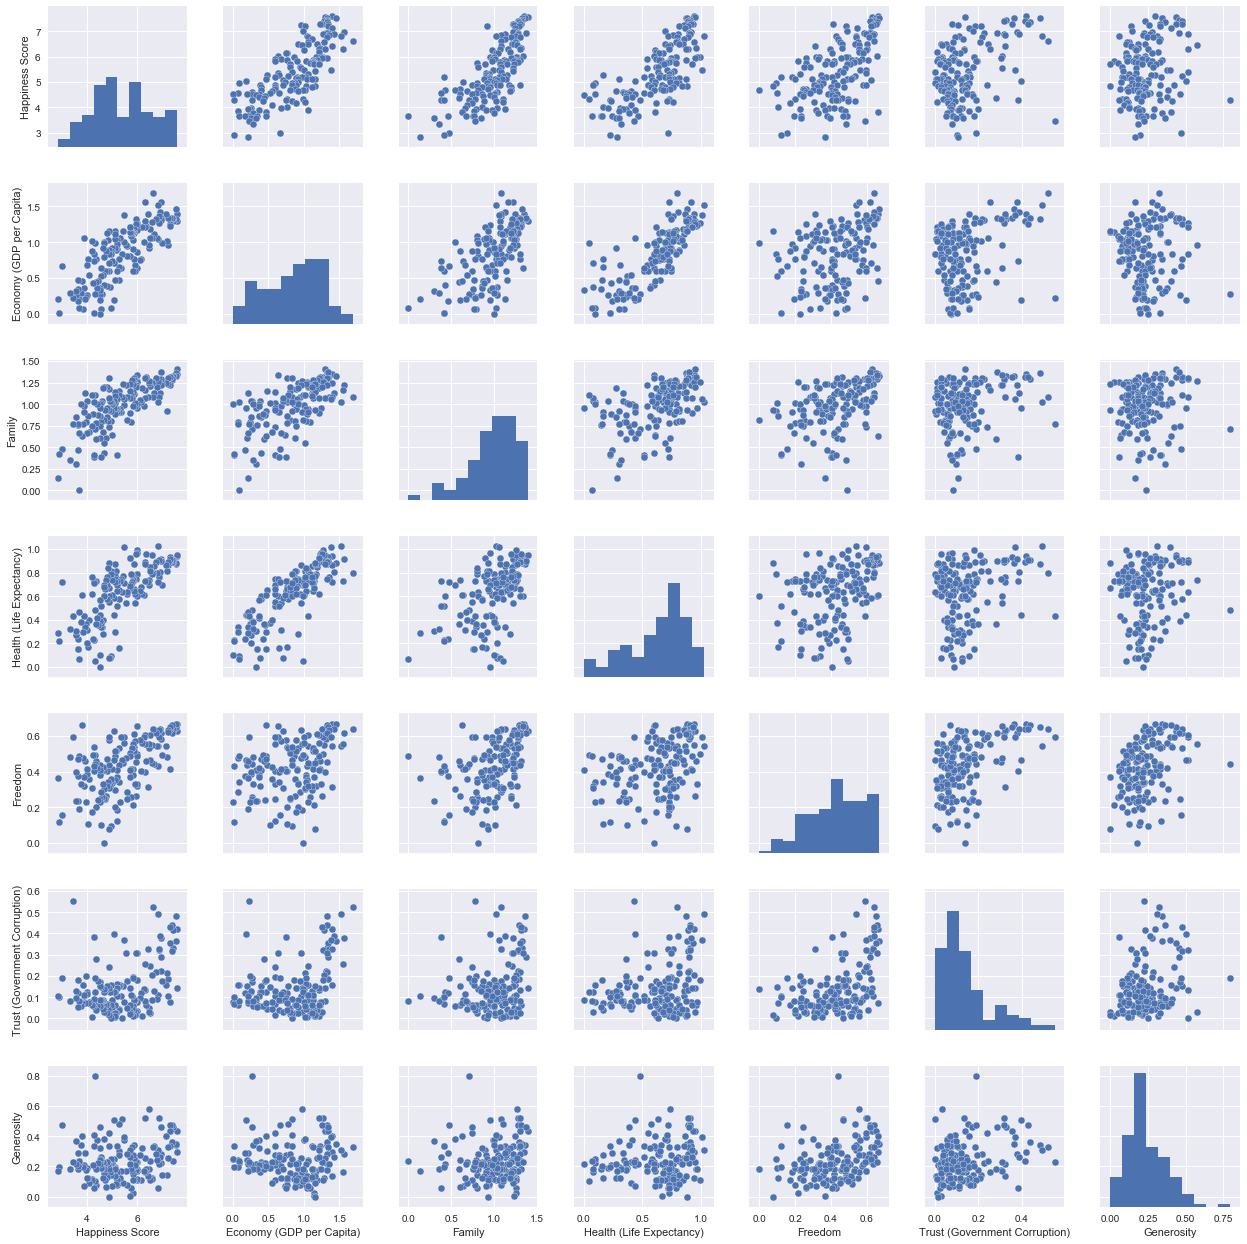

In [58]:
sns.pairplot(df[key_variables], size = 2.5)
plt.show()

From the pairwise scatterplot, we observed that Happiness Score and Economic (GDP Per Capita) has a positive linear relationship. The distributions of Family, Health (Life Expectancy) and Freedom also have a relative positive correlation with Happiness Score. Economic (GDP Per Capita), Family, Health (Life Expectancy) and Freedom are left skewed. The distributions of Trust (Government Corruption) and Generousity are right skewed.

### Correlation Plot

                               Happiness Score  Economy (GDP per Capita)  \
Happiness Score                       1.000000                  0.780966   
Economy (GDP per Capita)              0.780966                  1.000000   
Family                                0.740605                  0.645299   
Health (Life Expectancy)              0.724200                  0.816478   
Freedom                               0.568211                  0.370300   
Trust (Government Corruption)         0.395199                  0.307885   
Generosity                            0.180319                 -0.010465   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Score                0.740605                  0.724200  0.568211   
Economy (GDP per Capita)       0.645299                  0.816478  0.370300   
Family                         1.000000                  0.531104  0.441518   
Health (Life Expectancy)       0.531104                  1.000000  0.360477

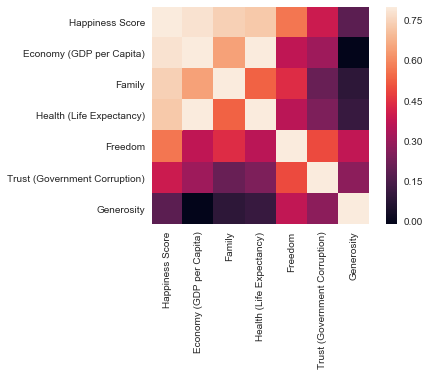

In [63]:
corrmat = df[key_variables].corr()
print(corrmat)
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Happiness Score has the highest correlation (r = 0.781) with Economic (GDP per Capita). It also has strong correlation with Family and Health (Life Expectancy). Note that Economy (GDP per Capita) and Health (Life Expectancy) has high correlation with each other so we need to be aware of multicolinearity when running regression model. Freedom and Happiness Score are somewhat correlated (r = 0.568), and Freedom itself has very little correlation with other variables.

### Happiness Score

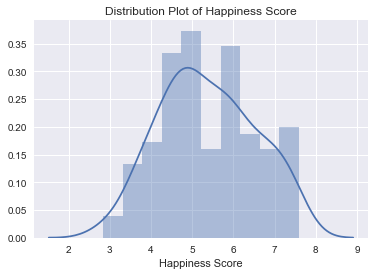

Country
Switzerland    7.587
Name: Happiness Score, dtype: float64


In [59]:
sns.distplot(df['Happiness Score'], bins=10)
plt.title("Distribution Plot of Happiness Score")
plt.show()
print(df["Happiness Score"][df["Happiness Score"] == max(df["Happiness Score"])])

First, we investigate Happiness Score. The summary shows that the average is about 5.38 with a standard deviation of 1.15. The Maximum is 7.59 and the minimum is 2.84. The distribution plot shows that Happiness Score is somewhat normally distributed. Switzerland has the highest Happiness Score among all countries.

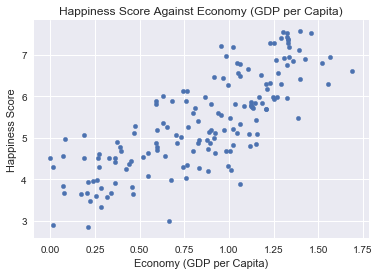

In [66]:
df.plot(kind = "scatter", x = "Economy (GDP per Capita)", y = "Happiness Score")
plt.title("Happiness Score Against Economy (GDP per Capita)")
plt.show()

As we can see, Happiness Score and Economy (GDP per Capita) are positively correlated and the relationship is somewhat linear.